# North Carolina Public Education Segregation Trends 2014 - 2019
**This report looks at segregation trends across all North Carolina Public Schools during 2014-2019**  

In [704]:
#import required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [705]:
#Read in 4 years worth of public high school data
path="C:/Users/Jake/Documents/GitHub/EducationDataNC/2019/School Datasets/PublicSchools2019.csv"
schData2019=pd.read_csv(path, low_memory=False)

path="C:/Users/Jake/Documents/GitHub/EducationDataNC/2018/School Datasets/PublicSchools2018.csv"
schData2018=pd.read_csv(path, low_memory=False)

path="C:/Users/Jake/Documents/GitHub/EducationDataNC/2017/School Datasets/PublicSchools2017.csv"
schData2017=pd.read_csv(path, low_memory=False)

path="C:/Users/Jake/Documents/GitHub/EducationDataNC/2016/School Datasets/PublicSchools2016.csv"
schData2016=pd.read_csv(path, low_memory=False)

path="C:/Users/Jake/Documents/GitHub/EducationDataNC/2015/School Datasets/PublicSchools2015.csv"
schData2015=pd.read_csv(path, low_memory=False)

path="C:/Users/Jake/Documents/GitHub/EducationDataNC/2014/School Datasets/PublicSchools2014.csv"
schData2014=pd.read_csv(path, low_memory=False)

In [706]:
data = {'Year': [2014,2015,2016,2017,2018,2019],
    
        'Total Campuses':[len(schData2014),len(schData2015),len(schData2016)
                         ,len(schData2017),len(schData2018),len(schData2019)],
                
        'Total Students': [schData2014['student_num'].sum(),schData2015['student_num'].sum(),
                           schData2016['student_num'].sum(),schData2017['student_num'].sum(),
                           schData2018['avg_student_num'].sum(), schData2019['avg_student_num_adm'].sum(),
                          ],
        
        'Avg Minority Pct': [schData2014['MinorityPct'].mean(),schData2015['MinorityPct'].mean(),
                             schData2016['MinorityPct'].mean(),schData2017['MinorityPct'].mean(),
                             schData2018['minority_pct'].mean(),schData2019['minority_pct'].mean()],
        
        'Avg White Pct': [schData2014['WhitePct'].mean(),schData2015['WhitePct'].mean(),
                             schData2016['WhitePct'].mean(),schData2017['WhitePct'].mean(),
                             schData2018['white_pct'].mean(),schData2019['white_pct'].mean()]}

campuses_considered = pd.DataFrame(data)
campuses_considered['Avg Minority Pct'] = np.round(campuses_considered['Avg Minority Pct'] * 100,2)
campuses_considered['Avg White Pct'] = np.round(campuses_considered['Avg White Pct'] * 100,2)
campuses_considered['Total Students'] = campuses_considered['Total Students'].astype(int)

print('\r')
print('          Campuses Considered in this Report')
print('-----------------------------------------------------------')
campuses_considered        


          Campuses Considered in this Report
-----------------------------------------------------------


,Year,Total Campuses,Total Students,Avg Minority Pct,Avg White Pct
0,2014,2561,1491161,49.20,50.80
1,2015,2585,1501893,49.72,50.28
2,2016,2599,1512208,50.58,49.42
3,2017,2617,1517530,51.40,48.60
4,2018,2642,1521108,52.14,47.86
5,2019,2702,1533139,52.69,47.31


## Campuses Considered in this Report
* The table above shows the total number of students and campuses considered in this report. 
* During the 2019-20 school year, there were 2,702 campuses and 1,533,139 students included. 

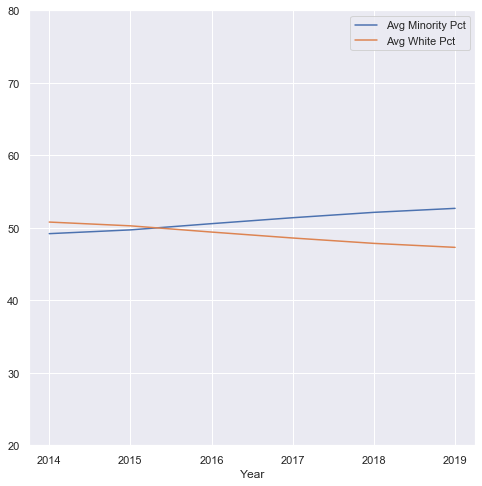

In [707]:
campuses_considered.plot(x='Year', y=['Avg Minority Pct','Avg White Pct'], kind="line", ylim=(20,80), figsize=(8,8) )

## Minority Students Makeup the Majority of Students in North Carolina
* Between 2014 and 2019 the average Minority percentage by campus grew from 49.2% to 52.69%
* During 2019 White students made up 47.31% of all public school campuses reporting student body memberships by race. 
* Statewide Minority student body membership exceeded White membership during the 2015-16 school year.
* As of 2019-20 around 7% of Public School Campuses did not report student body memberships by race in the NCDPI statistical profiles database (more details below).  

In [708]:
campuses_considered['Campuses Missing Race'] =\
  [len(schData2014[schData2014.WhitePct.isnull() | schData2014.MinorityPct.isnull()]),
   len(schData2015[schData2015.WhitePct.isnull() | schData2015.MinorityPct.isnull()]),
   len(schData2016[schData2016.WhitePct.isnull() | schData2016.MinorityPct.isnull()]),
   len(schData2017[schData2017.WhitePct.isnull() | schData2017.MinorityPct.isnull()]),
   len(schData2018[schData2018.white_pct.isnull() | schData2018.minority_pct.isnull()]),
   len(schData2019[schData2019.white_pct.isnull() | schData2019.minority_pct.isnull()])
  ]

campuses_considered['Charters Missing Race'] =\
  [len(schData2014['Lea_Name'][(schData2014.WhitePct.isnull() | schData2014.MinorityPct.isnull()) 
       & schData2014['Lea_Name'].str.startswith('Charter')]),
   len(schData2015['Lea_Name'][(schData2015.WhitePct.isnull() | schData2015.MinorityPct.isnull()) 
       & schData2015['Lea_Name'].str.startswith('Charter')]),
   len(schData2016['Lea_Name'][(schData2016.WhitePct.isnull() | schData2016.MinorityPct.isnull()) 
       & schData2016['Lea_Name'].str.startswith('Charter')]),
   len(schData2017['Lea_Name'][(schData2017.WhitePct.isnull() | schData2017.MinorityPct.isnull()) 
       & schData2017['Lea_Name'].str.startswith('Charter')]),
   len(schData2018['lea_name'][(schData2018.white_pct.isnull() | schData2018.minority_pct.isnull()) 
       & (schData2018['lea_code'] == 'CH')]),
   len(schData2019['lea_name'][(schData2019.white_pct.isnull() | schData2019.minority_pct.isnull()) 
       & (schData2019['lea_code_loc'] == 'CH')])
  ]

campuses_considered['Missing %'] = np.round((campuses_considered['Campuses Missing Race'] / 
                                             campuses_considered['Total Campuses'])*100,2)
campuses_considered['Charter Missing %'] = np.round((campuses_considered['Charters Missing Race'] / 
                                                     campuses_considered['Total Campuses'])*100,2)
print('\r')
print('               Campuses Missing Student Body Memberships By Race')
print('-----------------------------------------------------------------------------------')

campuses_considered[['Year','Total Campuses','Campuses Missing Race','Charters Missing Race','Missing %','Charter Missing %']]


               Campuses Missing Student Body Memberships By Race
-----------------------------------------------------------------------------------


,Year,Total Campuses,Campuses Missing Race,Charters Missing Race,Missing %,Charter Missing %
0,2014,2561,134,127,5.23,4.96
1,2015,2585,153,147,5.92,5.69
2,2016,2599,170,162,6.54,6.23
3,2017,2617,174,168,6.65,6.42
4,2018,2642,182,176,6.89,6.66
5,2019,2702,246,190,9.10,7.03


## How many Campuses are Missing Student Body Memberships by Race?
* This table shows campuses that do not appear to report student body memberships by race in the NCDPI statistical profiles database
* The vast majority of these campuses are charter schools.
* Typically charter schools are highly segregated.
* Charter school performance and quality of education is also typically better than the average school.  

In [709]:
schData2014 = schData2014[schData2014.WhitePct.notnull() & schData2014.MinorityPct.notnull()]
schData2015 = schData2015[schData2015.WhitePct.notnull() & schData2015.MinorityPct.notnull()]
schData2016 = schData2016[schData2016.WhitePct.notnull() & schData2016.MinorityPct.notnull()]
schData2017 = schData2017[schData2017.WhitePct.notnull() & schData2017.MinorityPct.notnull()]
schData2018 = schData2018[schData2018.white_pct.notnull() & schData2018.minority_pct.notnull()]
schData2019 = schData2019[schData2019.white_pct.notnull() & schData2019.minority_pct.notnull()]

data = {'Year': [2014,2015,2016,2017,2018,2019],
    
        'Total Campuses':[len(schData2014),len(schData2015),len(schData2016)
                         ,len(schData2017),len(schData2018),len(schData2019)],
                
        'Total Students': [schData2014['student_num'].sum(),schData2015['student_num'].sum(),
                           schData2016['student_num'].sum(),schData2017['student_num'].sum(),
                           schData2018['avg_student_num'].sum(), schData2019['avg_student_num_adm'].sum(),
                          ],
        
        'Avg Minority Pct': [schData2014['MinorityPct'].mean(),schData2015['MinorityPct'].mean(),
                             schData2016['MinorityPct'].mean(),schData2017['MinorityPct'].mean(),
                             schData2018['minority_pct'].mean(),schData2019['minority_pct'].mean()],
        
        'Avg White Pct': [schData2014['WhitePct'].mean(),schData2015['WhitePct'].mean(),
                          schData2016['WhitePct'].mean(),schData2017['WhitePct'].mean(),
                          schData2018['white_pct'].mean(),schData2019['white_pct'].mean()]}

campuses_reporting = pd.DataFrame(data)
campuses_reporting['Avg Minority Pct'] = np.round(campuses_reporting['Avg Minority Pct'] * 100,2)
campuses_reporting['Avg White Pct'] = np.round(campuses_reporting['Avg White Pct'] * 100,2)
campuses_reporting['Total Students'] = campuses_reporting['Total Students'].astype(int)

campuses_reporting['Known Missing Students'] = campuses_considered['Total Students'] - campuses_reporting['Total Students']
campuses_reporting['Known Missing Campuses'] = campuses_considered['Total Campuses'] - campuses_reporting['Total Campuses']

print('\r')
print('                   Campuses Reporting Race and Considered in the Charts Below')
print('-----------------------------------------------------------------------------------------------------')
campuses_reporting


                   Campuses Reporting Race and Considered in the Charts Below
-----------------------------------------------------------------------------------------------------


,Year,Total Campuses,Total Students,Avg Minority Pct,Avg White Pct,Known Missing Students,Known Missing Campuses
0,2014,2427,1433959,49.20,50.80,57202,134
1,2015,2432,1433387,49.72,50.28,68506,153
2,2016,2429,1431661,50.58,49.42,80547,170
3,2017,2443,1427137,51.40,48.60,90393,174
4,2018,2460,1422213,52.14,47.86,98895,182
5,2019,2456,1423868,52.69,47.31,109271,246


### Excluding Campuses that do not Report Student Body Memberships By Race
* This table shows the impact to statewide student and campus counts once campuses not reporting race memberships are excluded. 
* The original Minority and White percentages remain unchanged since the excluded schools were not reporting race memberships.

In [719]:
seg_lvl = .8

campuses_reporting['White Segregated'] =\
  [ sum((schData2014['WhitePct'] >= seg_lvl)),
    sum((schData2015['WhitePct'] >= seg_lvl)),
    sum((schData2016['WhitePct'] >= seg_lvl)),
    sum((schData2017['WhitePct'] >= seg_lvl)),
    sum((schData2018['white_pct'] >= seg_lvl)),
    sum((schData2019['white_pct'] >= seg_lvl))   
  ]

campuses_reporting['White Segregated Pct'] = np.round((campuses_reporting['White Segregated'] / 
                                                       campuses_reporting['Total Campuses']) * 100, 2)

campuses_reporting['Minority Segregated'] =\
  [ sum((schData2014['MinorityPct'] >= seg_lvl)),
    sum((schData2015['MinorityPct'] >= seg_lvl)),
    sum((schData2016['MinorityPct'] >= seg_lvl)),
    sum((schData2017['MinorityPct'] >= seg_lvl)),
    sum((schData2018['minority_pct'] >= seg_lvl)),
    sum((schData2019['minority_pct'] >= seg_lvl))   
  ]

campuses_reporting['Minority Segregated Pct'] = np.round((campuses_reporting['Minority Segregated'] / 
                                                          campuses_reporting['Total Campuses']) * 100, 2)

campuses_reporting['Total Segregated'] =\
  [ sum((schData2014['WhitePct'] >= seg_lvl) | (schData2014['MinorityPct'] >= seg_lvl)),
    sum((schData2015['WhitePct'] >= seg_lvl) | (schData2015['MinorityPct'] >= seg_lvl)),
    sum((schData2016['WhitePct'] >= seg_lvl) | (schData2016['MinorityPct'] >= seg_lvl)),
    sum((schData2017['WhitePct'] >= seg_lvl) | (schData2017['MinorityPct'] >= seg_lvl)),
    sum((schData2018['white_pct'] >= seg_lvl) | (schData2018['minority_pct'] >= seg_lvl)),
    sum((schData2019['white_pct'] >= seg_lvl) | (schData2019['minority_pct'] >= seg_lvl))   
  ]

campuses_reporting['Total Segregated Pct'] = np.round((campuses_reporting['Total Segregated'] / 
                                                       campuses_reporting['Total Campuses']) * 100, 2)

campuses_reporting[['Year', 'Total Campuses', 'Minority Segregated','Minority Segregated Pct',
                   'White Segregated','White Segregated Pct','Total Segregated','Total Segregated Pct',
                  ]]

print('\r')
print('                                     Campuses Reporting Race and Known Missing Students')
print('-------------------------------------------------------------------------------------------------------------------------------')
campuses_reporting


                                     Campuses Reporting Race and Known Missing Students
-------------------------------------------------------------------------------------------------------------------------------


,Year,Total Campuses,Total Students,Avg Minority Pct,Avg White Pct,Known Missing Students,Known Missing Campuses,White Segregated,White Segregated Pct,Minority Segregated,Minority Segregated Pct,Total Segregated,Total Segregated Pct
0,2014,2427,1433959,49.20,50.80,57202,134,420,17.31,418,17.22,838,34.53
1,2015,2432,1433387,49.72,50.28,68506,153,412,16.94,429,17.64,841,34.58
2,2016,2429,1431661,50.58,49.42,80547,170,375,15.44,443,18.24,818,33.68
3,2017,2443,1427137,51.40,48.60,90393,174,334,13.67,465,19.03,799,32.71
4,2018,2460,1422213,52.14,47.86,98895,182,322,13.09,496,20.16,818,33.25
5,2019,2456,1423868,52.69,47.31,109271,246,321,13.07,508,20.68,829,33.75


In [720]:
print('Total Segregated Pct 2014-2019 Avg:\n',np.round(campuses_reporting['Total Segregated Pct'].mean(),2))
print('Minority Segregated Pct 2014-2019 Avg:\n',np.round(campuses_reporting['Minority Segregated Pct'].mean(),2))
print('White Segregated Pct 2014-2019 Avg:\n',np.round(campuses_reporting['White Segregated Pct'].mean(),2))

Total Segregated Pct 2014-2019 Avg:
 33.75
Minority Segregated Pct 2014-2019 Avg:
 18.83
White Segregated Pct 2014-2019 Avg:
 14.92


In [721]:
campuses_reporting['White Segregated Students'] =\
  [ schData2014['student_num'][(schData2014['WhitePct'] >= seg_lvl)].sum(),
    schData2015['student_num'][(schData2015['WhitePct'] >= seg_lvl)].sum(),
    schData2016['student_num'][(schData2016['WhitePct'] >= seg_lvl)].sum(),
    schData2017['student_num'][(schData2017['WhitePct'] >= seg_lvl)].sum(),
    schData2018['avg_student_num'][(schData2018['white_pct'] >= seg_lvl)].sum(),
    schData2019['avg_student_num_adm'][(schData2019['white_pct'] >= seg_lvl)].sum()   
  ]

campuses_reporting['Minority Segregated Students'] =\
  [ schData2014['student_num'][(schData2014['MinorityPct'] >= seg_lvl)].sum(),
    schData2015['student_num'][(schData2015['MinorityPct'] >= seg_lvl)].sum(),
    schData2016['student_num'][(schData2016['MinorityPct'] >= seg_lvl)].sum(),
    schData2017['student_num'][(schData2017['MinorityPct'] >= seg_lvl)].sum(),
    schData2018['avg_student_num'][(schData2018['minority_pct'] >= seg_lvl)].sum(),
    schData2019['avg_student_num_adm'][(schData2019['minority_pct'] >= seg_lvl)].sum()   
  ]

campuses_reporting['Total Segregated Students'] =\
  [ schData2014['student_num'][(schData2014['MinorityPct'] >= seg_lvl) | (schData2014['WhitePct'] >= seg_lvl)].sum(),
    schData2015['student_num'][(schData2015['MinorityPct'] >= seg_lvl) | (schData2015['WhitePct'] >= seg_lvl)].sum(),
    schData2016['student_num'][(schData2016['MinorityPct'] >= seg_lvl) | (schData2016['WhitePct'] >= seg_lvl)].sum(),
    schData2017['student_num'][(schData2017['MinorityPct'] >= seg_lvl) | (schData2017['WhitePct'] >= seg_lvl)].sum(),
    schData2018['avg_student_num'][(schData2018['minority_pct'] >= seg_lvl) | (schData2018['white_pct'] >= seg_lvl)].sum(),
    schData2019['avg_student_num_adm'][(schData2019['minority_pct'] >= seg_lvl) | (schData2019['white_pct'] >= seg_lvl)].sum()   
  ]

campuses_reporting['White Seg Student Pct'] = np.round((campuses_reporting['White Segregated Students'] /
                                                        campuses_reporting['Total Students']) * 100, 2)
campuses_reporting['Minority Seg Student Pct'] = np.round((campuses_reporting['Minority Segregated Students'] /
                                                        campuses_reporting['Total Students']) * 100, 2)
campuses_reporting['Total Seg Student Pct'] = np.round((campuses_reporting['Total Segregated Students'] /
                                                        campuses_reporting['Total Students']) * 100, 2)

campuses_reporting['White Segregated Students'] = campuses_reporting['White Segregated Students'].astype(int)
campuses_reporting['Minority Segregated Students'] =campuses_reporting['Minority Segregated Students'].astype(int)
campuses_reporting['Total Segregated Students'] = campuses_reporting['Total Segregated Students'].astype(int)



In [727]:
print('\r')
print('                                     Highly Segregated Student Counts')
print('----------------------------------------------------------------------------------------------------')
campuses_reporting[['Year','Total Campuses','Total Students','White Segregated Students','Minority Segregated Students','Total Segregated Students']]


                                     Highly Segregated Student Counts
----------------------------------------------------------------------------------------------------


,Year,Total Campuses,Total Students,White Segregated Students,Minority Segregated Students,Total Segregated Students
0,2014,2427,1433959,214090,220341,434431
1,2015,2432,1433387,208271,234361,442632
2,2016,2429,1431661,182533,239276,421809
3,2017,2443,1427137,156961,245227,402188
4,2018,2460,1422213,148028,260292,408320
5,2019,2456,1423868,142938,268039,410977


In [734]:
print('\r')
print('                            Highly Segregated Student Percentages')
print('-----------------------------------------------------------------------------------------')
campuses_reporting[['Year','Total Campuses','Total Students','White Seg Student Pct','Minority Seg Student Pct','Total Seg Student Pct']]


                            Highly Segregated Student Percentages
-----------------------------------------------------------------------------------------


,Year,Total Campuses,Total Students,White Seg Student Pct,Minority Seg Student Pct,Total Seg Student Pct
0,2014,2427,1433959,14.93,15.37,30.30
1,2015,2432,1433387,14.53,16.35,30.88
2,2016,2429,1431661,12.75,16.71,29.46
3,2017,2443,1427137,11.00,17.18,28.18
4,2018,2460,1422213,10.41,18.30,28.71
5,2019,2456,1423868,10.04,18.82,28.86


In [735]:
print('Total Seg Student Pct 2014-2019 Avg:\n',np.round(campuses_reporting['Total Seg Student Pct'].mean(),2))
print('Minority Seg Student Pct 2014-2019 Avg:\n',np.round(campuses_reporting['Minority Seg Student Pct'].mean(),2))
print('White Seg Student Pct 2014-2019 Avg:\n',np.round(campuses_reporting['White Seg Student Pct'].mean(),2))

Total Seg Student Pct 2014-2019 Avg:
 29.4
Minority Seg Student Pct 2014-2019 Avg:
 17.12
White Seg Student Pct 2014-2019 Avg:
 12.28


## Highly Segregated Campuses in North Carolina Public Schools
* This report defines a highly segregated campus as one with a Minority or White student body membership that is >= 80% of the entire campus. 
* Highly segregated campuses made up 33.75% of all North Carolina Public Schools reporting student body race memberships between 2014 and 2019.     
* 29.4% of all North Carolina students attended highly segregated campuses during this same period. 
* On average, 17.12% of these students were Minorities while 12.28% were White. 

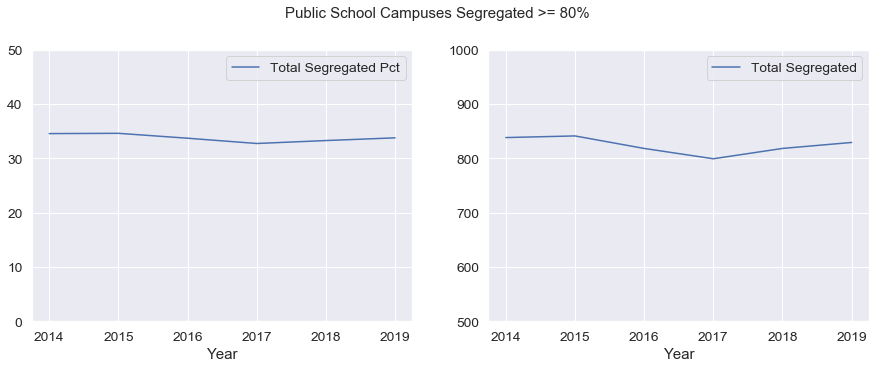

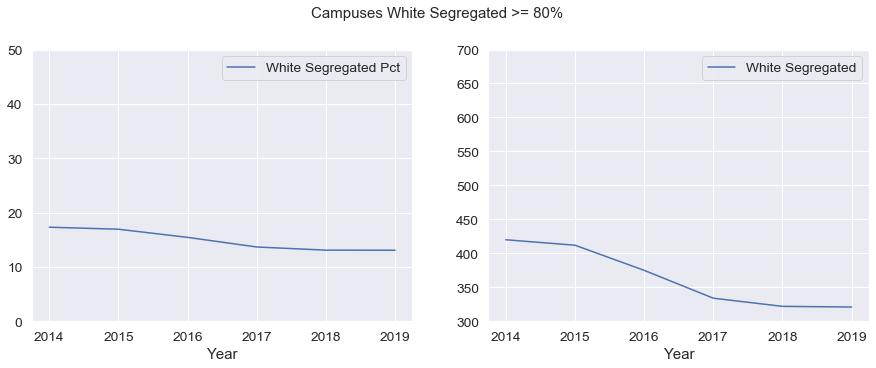

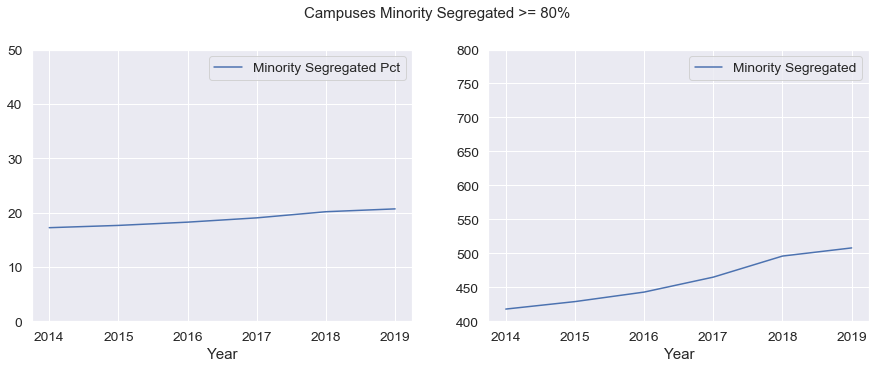

In [433]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2, nrows=1)
plt.suptitle("Public School Campuses Segregated >= 80%", y = 1, fontsize=15)
campuses_reporting.plot(x='Year', y=['Total Segregated Pct'], kind="line", ylim=(0,50), ax=axs[0])
campuses_reporting.plot(x='Year', y=['Total Segregated'], kind="line", ylim=(500,1000), ax=axs[1])
plt.show()


fig, axs = plt.subplots(figsize=(15,5), ncols=2, nrows=1)
plt.suptitle("Campuses White Segregated >= 80%", y = 1, fontsize=15)
campuses_reporting.plot(x='Year', y=['White Segregated Pct'], kind="line", ylim=(0,50), ax=axs[0])
campuses_reporting.plot(x='Year', y=['White Segregated'], kind="line", ylim=(300,700), ax=axs[1])
plt.show()

fig, axs = plt.subplots(figsize=(15,5), ncols=2, nrows=1)
plt.suptitle("Campuses Minority Segregated >= 80%", y = 1, fontsize=15)
campuses_reporting.plot(x='Year', y=['Minority Segregated Pct'], kind="line", ylim=(0,50), ax=axs[0])
campuses_reporting.plot(x='Year', y=['Minority Segregated'], kind="line", ylim=(400,800), ax=axs[1])
plt.show()

## Highly Segregated Campus Trends 2014 - 2019
* The charts above show highly segregated campus trends between 2014 - 2019. 
* During the 2014-15 and 2015-16 school years, North Carolina had similarly sized populations of Minority and White segregated schools, each making up around 17% of all schools.
* However, between 2014 and 2019 highly segregated White campuses have decreased by 4.24% while highly segregated Minority campuses have increased 3.46% and now make up 20.68% of all public school campuses in North Carolina. 
* Likewise highly segregated White students decreased 4.89% while highly segregated Minority students increased 3.45% during the same period. 
* The disparity between highly segregated White and Minority student populations during 2014 was 0.44%.  
* This same disparity has now grown to 8.78% as of 2019.      

In [736]:
def make_plot(dat,ax, title):
    sns.set(color_codes=True)
    hst = sns.distplot(dat, kde=False, ax=ax,bins=10)
    hst.set_xlabel(title)
    return

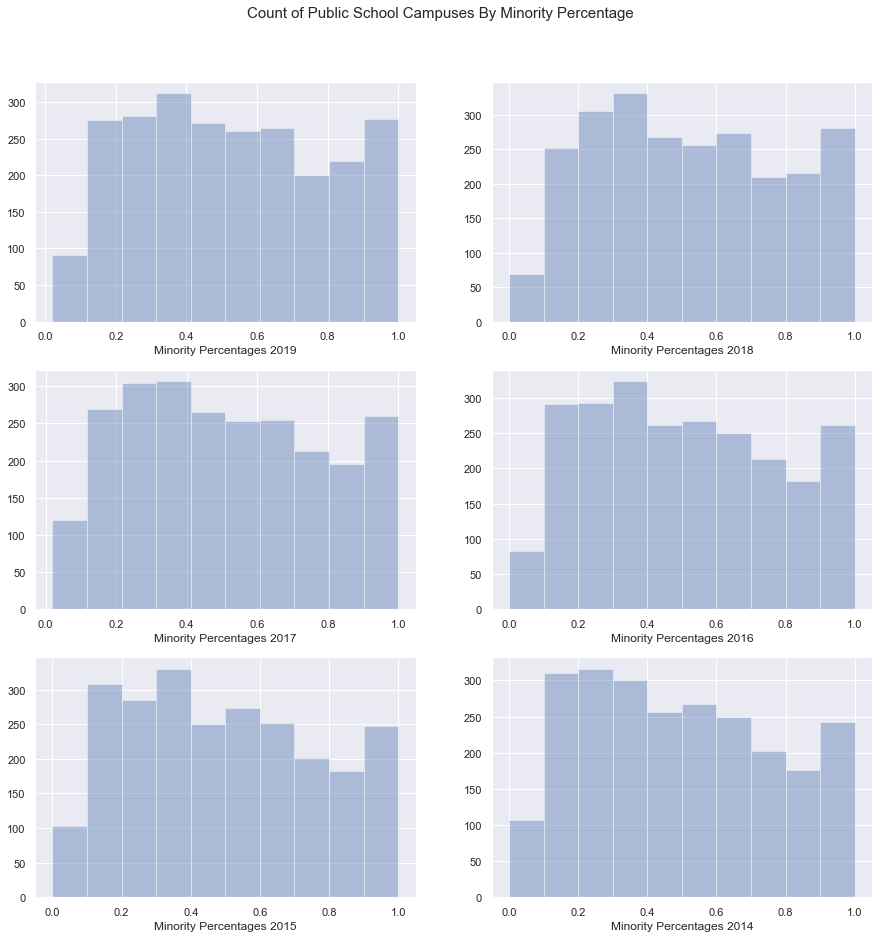

In [737]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make an axis for each chart
fig, axs = plt.subplots(figsize=(15,15), ncols=2, nrows=3)

# The amount of space above titles
plt.suptitle("Count of Public School Campuses By Minority Percentage", y = .95, fontsize=15)
    
# Get reported minorty percentages for 2019 
make_plot(schData2019['minority_pct'].dropna(), axs[0][0], "Minority Percentages 2019")
# Get reported minorty percentages for 2018
make_plot(schData2018['minority_pct'].dropna(), axs[0][1],"Minority Percentages 2018")
# Get reported minorty percentages for 2017
make_plot(schData2017['MinorityPct'].dropna(), axs[1][0],"Minority Percentages 2017")
# Get reported minorty percentages for 2016
make_plot(schData2016['MinorityPct'].dropna(), axs[1][1],"Minority Percentages 2016")
# Get reported minorty percentages for 2015
make_plot(schData2015['MinorityPct'].dropna(), axs[2][0],"Minority Percentages 2015")
# Get reported minorty percentages for 2014
make_plot(schData2014['MinorityPct'].dropna(), axs[2][1],"Minority Percentages 2014")

### Campus Counts by Minority Percentage
**The charts above show North Carolina campus counts between 2014 and 2019 by Minority Percentages** 

In [744]:


campuses_reporting['Avg Eds'] = [np.nan,np.nan,np.nan, schData2017['pct_eds'].mean(),
                                 schData2018['pct_eds'].mean(),schData2019['pct_eds'].mean()]

campuses_reporting['White Seg Avg Eds'] = [np.nan,
                                           np.nan,
                                           np.nan,
                                           schData2017['pct_eds'][(schData2017['WhitePct'] >= seg_lvl)].mean(),
                                           schData2018['pct_eds'][(schData2018['white_pct'] >= seg_lvl)].mean(),
                                           schData2019['pct_eds'][(schData2019['white_pct'] >= seg_lvl)].mean()]

campuses_reporting['Minority Seg Avg Eds'] = [np.nan,
                                              np.nan,
                                              np.nan,
                                              schData2017['pct_eds'][(schData2017['MinorityPct'] >= seg_lvl)].mean(),
                                              schData2018['pct_eds'][(schData2018['minority_pct'] >= seg_lvl)].mean(),
                                              schData2019['pct_eds'][(schData2019['minority_pct'] >= seg_lvl)].mean()]

campuses_reporting['Total Seg Avg Eds'] = [np.nan,np.nan,np.nan,
                                           schData2017['pct_eds'][(schData2017['MinorityPct'] >= seg_lvl)
                                                                 |(schData2017['WhitePct'] >= seg_lvl)].mean(),
                                           schData2018['pct_eds'][(schData2018['minority_pct'] >= seg_lvl)
                                                                 |(schData2018['white_pct'] >= seg_lvl)].mean(),
                                           schData2019['pct_eds'][(schData2019['minority_pct'] >= seg_lvl)
                                                                 |(schData2019['white_pct'] >= seg_lvl)].mean()]


campuses_reporting['Avg Eds'] = np.round(campuses_reporting['Avg Eds'],2)
campuses_reporting['Minority Seg Avg Eds'] = np.round(campuses_reporting['Minority Seg Avg Eds'],2)
campuses_reporting['White Seg Avg Eds'] = np.round(campuses_reporting['White Seg Avg Eds'],2)
campuses_reporting['Total Seg Avg Eds'] = np.round(campuses_reporting['Total Seg Avg Eds'],2)

print('\r')
print('      Economic Disadvantage in Highly Segregated Schools')
print('---------------------------------------------------------------')

campuses_reporting[['Year','Avg Eds','Total Seg Avg Eds','Minority Seg Avg Eds','White Seg Avg Eds']][campuses_reporting.Year > 2016]



      Economic Disadvantage in Highly Segregated Schools
---------------------------------------------------------------


,Year,Avg Eds,Total Seg Avg Eds,Minority Seg Avg Eds,White Seg Avg Eds
3,2017,54.24,60.71,70.84,46.60
4,2018,49.26,54.71,62.50,42.68
5,2019,52.20,57.62,66.41,43.75


In [745]:
print('Avg EDS Pct 2017-2019:\n',campuses_reporting['Avg Eds'].mean())
print('Total Seg Avg Eds 2017-2019:\n',np.round(campuses_reporting['Total Seg Avg Eds'].mean(),2))
print('Minority Seg Avg Eds 2017-2019:\n',np.round(campuses_reporting['Minority Seg Avg Eds'].mean(),2))
print('White Seg Avg Eds 2017-2019:\n',np.round(campuses_reporting['White Seg Avg Eds'].mean(),2))

Avg EDS Pct 2017-2019:
 51.9
Total Seg Avg Eds 2017-2019:
 57.68
Minority Seg Avg Eds 2017-2019:
 66.58
White Seg Avg Eds 2017-2019:
 44.34


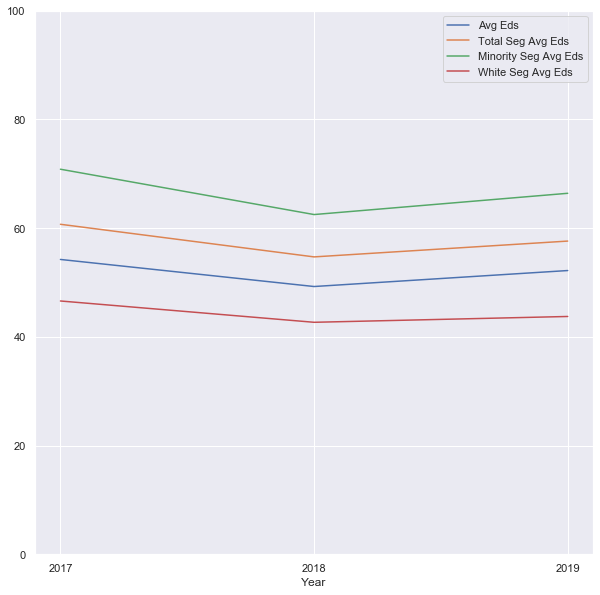

In [746]:
campuses_reporting.plot(x='Year', y=['Avg Eds','Total Seg Avg Eds','Minority Seg Avg Eds','White Seg Avg Eds'], kind="line",
                        ylim=(0,100), figsize=(10,10), xticks=[2017,2018,2019])

### Highly Segregated Campuses and Economic Disadvantage (EDS)
* The percentage of Economically Disadvantaged students represents the portion of students on each campus which take advantage of the free lunch program. 
* This data became available during the 2017-18 school year.  
* The chart and table above show that all North Carolina public schools averaged a 51.9% EDS student population.
* Highly segregated campuses have an EDS student population that is 5.78% higher.
* However, this increase comes entirely from highly segregated Minority campuses which averaged 66.58% EDS students over the same three year period.  
* In stark contrast, are highly segregated White school campuses which averaged 44.34% which is actually 22.24% lower than highly minority segregated campuses and 7.56% lower than the average for all campuses in North Carolina during the 3 year period. 

### Privilege Segregation in North Carolina
* When considering Economic Disadvantage in North Carolina Public schools, it appears that highly segregated White campuses are segregated by substantially higher levels of privilege when compared other public school campuses.
* This **privilege disparity** is 22.24% higher when compared to their highly Minority segregated campus counter parts.
* The high degree of **privilege disparity** present in the White segregated campuses indicates to me that minorities may also receive a lower quality of education when compared to highly segregated White students.  
* This result demands that a much closer analysis and comparison of North Carolina specific Educational Attainment indicators be performed to measure this disparity and the quality of education that highly segregated minorities receive in North Carolina.

# Comparing Highly Segregated White and Minority Campuses

**The remainder of this report compares North Carolina's Educational Performance Indicators for highly segregated White and Minority campuses.**   
* North Carolina's [Educational Performance Indicators](https://dashboard.myfuturenc.org/all-indicators/) were selected by the State's leading experts in education. 
* These key performance indicators were chosen to guide North Carolina to a [goal](https://www.myfuturenc.org/the-goal/) of closing the education "skills gap" by 2030.  
* Fewer than half of North Carolinians ages 25-44 have high quality credentials or post secondary degrees.
* While the experts acknowledge that ["North Carolinians from economically disadvantaged backgrounds are disproportionately affected"](https://www.myfuturenc.org/the-goal/), it is important to note that economic disadvantage also disproportionately affects Minorities.

C:\Users\Jake\Anaconda3\envs\ML7331\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


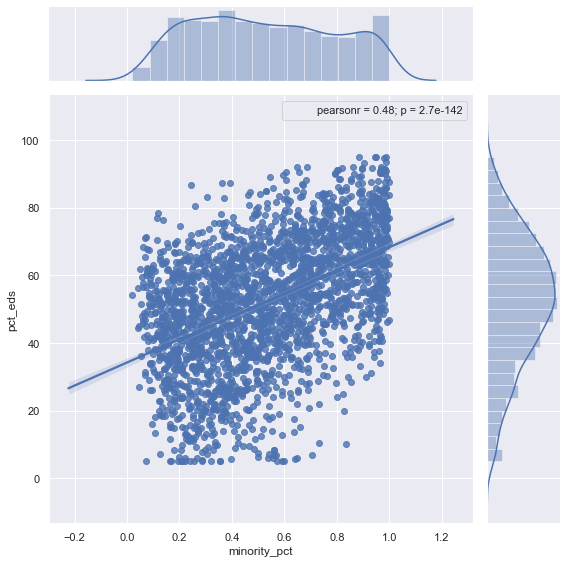

C:\Users\Jake\Anaconda3\envs\ML7331\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


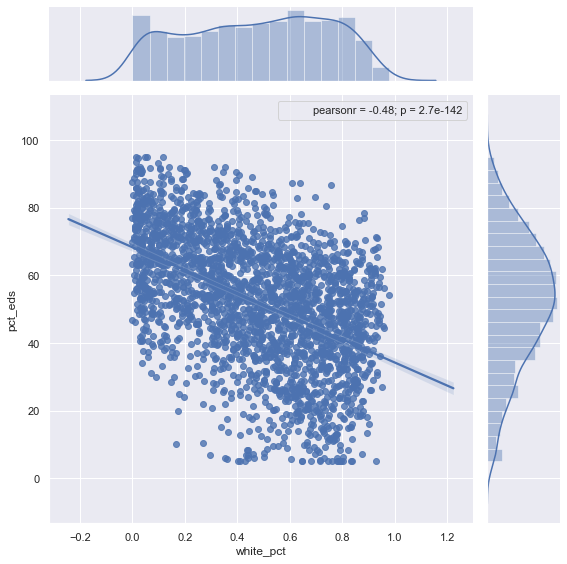

In [702]:
import seaborn as sns
import scipy.stats as stats

sns.set(style="darkgrid", color_codes=True)

j = sns.jointplot(x='minority_pct', y='pct_eds', data=schData2019, kind="reg", height=8)
j.annotate(stats.pearsonr) #stats.spearmanr

plt.show()

j = sns.jointplot(x='white_pct', y='pct_eds', data=schData2019, kind="reg", height=8)
j.annotate(stats.pearsonr) #pearsonr #spearmanr
plt.show()


### Are Student Relationships Between Economic Disadvantage and Race Significant in North Carolina?
* Yes! As shown above, when student body economic priviledge increases in North Carolina so does the percentage of White students.  
* At oposite ends of this spectrum, the economic priviledge gap appears to differ by around 35%.
* The average percentage of campus Minorities has a moderately positive correlation (0.48) to increasing campus levels of economic disadvantage while White students have a moderately negative correlation (-0.48).
* Simply put, this means more White students on campus equals less economic disadvantage on campus.  
* Likewise, more Minority students on campus equals more economic disadvantage on campus.  
* Both correlations have a VERY small p value of 2.7e-142.
* Therefore, we must strongly reject the null hypothesis that this relationship could have happened by chance.  

# Key Performance Indicators for Educational Attainment in North Carolina 
* Each of the indicators we review are closely related to the [Educational Performance Indicators](https://dashboard.myfuturenc.org/all-indicators/) selected by statewide education experts as part of the [MyFutureNC project](https://www.myfuturenc.org/).
* Since MyFutureNC has selected indicators that span across all levels of education, the indicators selected below will not be a one to one mapping in all instances.

In [747]:
topLineKips = [  'pct_ccr_rd_04_all_pc', 
                 'pct_glp_rd_04_all_pc', 
                 'pct_ccr_ma_08_all_pc', 
                 'pct_glp_ma_08_all_pc', 
                 'count_all_pk_enroll',
                 'pct_acall_all_act',
                 'pct_acco_all_act',
                 'ada_adm_ratio_2019_attendance', 
                 'pct_all_chron_absent',
                 'pct_std_all_cgr',
                 'pct_ext_all_cgr',
                 'pct_enrolled_2018_enroll_all_college',
                 'spg_score_all_spg2',
                 'ma_spg_score_all_spg2',
                 'rd_spg_score_all_spg2',
                 'act_per1000_all_inc2', # 'crime',
                 'sts_per1000_all_inc2',  # 'short_term',
                 'lts_per1000_all_inc2', # 'long_term',
                 'exp_per1000_all_inc2'  #'expulsion'
                 ]

kipNames =    ['4th Grade Reading CACR',
               '4th Grade Reading GLP',
               '8th Grade Math CACR',
               '8th Grade Math GLP',
               'PK Enrollment',
               'the ACT Composite Score',
               'the ACT Score UNC 17 Min',
               'Avg Daily Attendance',
               'Chronic Absence',
               'the 4yr Graduation Rate',
               'the 5yr Graduation Rate',
               'Pct Enrl College',
               'Spg Scores',
               'Math Spg Scores',
               'Reading Spg Scores',
               'Crime Per 1000',
               'Short Term Susp Per 1000',
               'Long Term Susp Per 1000',
               'Expulsions Per 1000'
               ]

kipXlims = [(0,100),
            (0,100),
            (0,100),
            (0,100),
            (0,100),
            (0,50),
            (0,100),
            (90,100),
            (0,50),
            (20,100),
            (20,100),
            (0,100),
            (0,100),
            (0,100),
            (0,100),
            (-10,100),
            (0,800),
            (0,5),
            (0,1)
           ]

In [748]:
schData2019['pct_all_chron_absent'] = schData2019['pct_all_chron_absent'] * 100
schData2019['pct_enrolled_2018_enroll_all_college'] = schData2019['pct_enrolled_2018_enroll_all_college'] * 100

In [749]:
# Create an and test a segregation indicator to create charts with
schData2019.loc[(schData2019['minority_pct'] >= seg_lvl),'HighlySegregatedType'] = 'Minority'
schData2019.loc[(schData2019['white_pct'] >= seg_lvl),'HighlySegregatedType'] = 'White'
schData2019.loc[(schData2019['white_pct'] < seg_lvl) & 
                (schData2019['minority_pct'] < seg_lvl),'HighlySegregatedType'] = 'None'

print('Length of dataset:', len(schData2019))
print('Values Accounted For:',schData2019["HighlySegregatedType"].value_counts().sum())
print('\nValue Counts:')
schData2019["HighlySegregatedType"].value_counts()

Length of dataset: 2456
Values Accounted For: 2456

Value Counts:


None        1627
Minority     508
White        321
Name: HighlySegregatedType, dtype: int64

### Comparing Key Performance Indicators
* The charts below compare both distributions and averages for each of the identified performance indicators. 
* In **ALL** cases, great disparity exists with respect to highly minority segregated campuses which perform below both non-highly segregated and highly White segregated campus populations.  
* In contradistinction, highly White segregated campuses experience a distinct privilege advantage across all indicators.

In [750]:
def PlotColumnKdeByYears(dataFrames, col, colName, xlim):
    
    #set histogram plot preferences
    sns.set(context='notebook', style='darkgrid', font_scale=1.25)
    fig, ax = plt.subplots(figsize=(15,10), ncols=1, nrows=1)
    
    ax.set_xlim(xlim[0],xlim[1])

    schYear = 2019
    pltRow = 0
    pltCol = 0
    
    #Plot KDE's for different student body racial compositions 
    try:
        kde1 = sns.distplot(df[col].loc[(df["HighlySegregatedType"] == "White")].dropna(),ax=ax)
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
            kde1 = sns.distplot(df[col].loc[(df["HighlySegregatedType"] == "White")].dropna(),ax=ax, kde_kws={'bw': 1.5})
        else:
            raise re
    
    try:
        kde2 = sns.distplot(df[col].loc[(df["HighlySegregatedType"] == "Minority")].dropna(),ax=ax)
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
            kde2 = sns.distplot(df[col].loc[(df["HighlySegregatedType"] == "Minority")].dropna(),ax=ax,kde_kws={'bw': 1.5})
        else:
            raise re    
    
    #kde1 = sns.distplot(df[col].loc[(df["HighlySegregatedType"] == "White")].dropna(),ax=ax)
    #kde2 = sns.distplot(df[col].loc[(df["HighlySegregatedType"] == "Minority")].dropna(),ax=ax)
    
    #Get the mean for each racial composition group
    m1 = df[col].loc[(df["HighlySegregatedType"] == "White")].mean()
    m2 = df[col].loc[(df["HighlySegregatedType"] == "Minority")].mean()
    m3 = df[col].loc[df["HighlySegregatedType"] == "None"].mean()

    #Add chart labels 
    kde2.set_title(colName + " for " + str(schYear))
    kde2.set_ylabel('Kernel Density Estimation') 
    kde2.set_xlabel(col + " " + str(schYear)) 
    #kde2.legend([">= 80% White", ">= 80% Minority"]) 

    #Use decimal places for percentages
    mMax = np.max([m1,m2,m3])
    dec = 3 if mMax <= 1 else 1

    #Find a y location for values of 0.0 using 5% of the max y label value
    ylimMin, ylimMax = ax.get_ylim()

    #Add a verticle line for the < 80% Segregated population mean
    y_i = ylimMax * 0.7 #<--- Control line height so number lables show
    kde2.vlines(m3,0,y_i,linestyles=[(0,(9,3,4,4))],colors='black')

    #Label the vline with its actual value
    m3 = np.around(m3, decimals=dec)
    kde2.annotate(s=m3, xy =(m3,y_i + (y_i * .01)), xycoords='data', ha='center')

    #Plot the legend before adding the last two verticle lines (no room for 5 entries)
    kde2.legend(["< 80% Mean", ">= 80% White", ">= 80% Minority"])

    #Add a verticle line for the >= 80% White Segregated population mean 
    y_i = ylimMax * 0.8 #<--- Control line height so number lables show
    kde1.vlines(m1,0,y_i,linestyles=[(0,(9,3,4,4))],colors='b')

    #Label the vline with its actual value
    m1 = np.around(m1, decimals=dec)
    kde1.annotate(s=m1, xy =(m1,y_i + (y_i * .01)), xycoords='data', ha='center')

    #Add a verticle line for the >= 80% Minority Segregated population mean 
    y_i = ylimMax * 0.75 #<--- Control line height so number lables show
    kde2.vlines(m2,0,y_i,linestyles=[(0,(9,3,4,4))],colors='r')

    #Label the vline with its actual value
    m2 = np.around(m2, decimals=dec)
    kde2.annotate(s=m2, xy =(m2,y_i + (y_i * .01)), xycoords='data', ha='center')  
          
    plt.show()

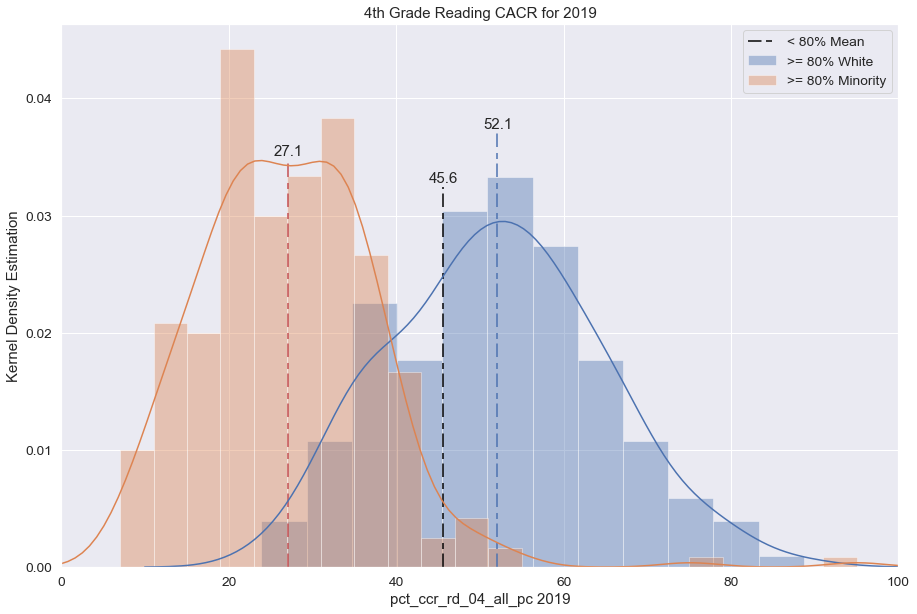

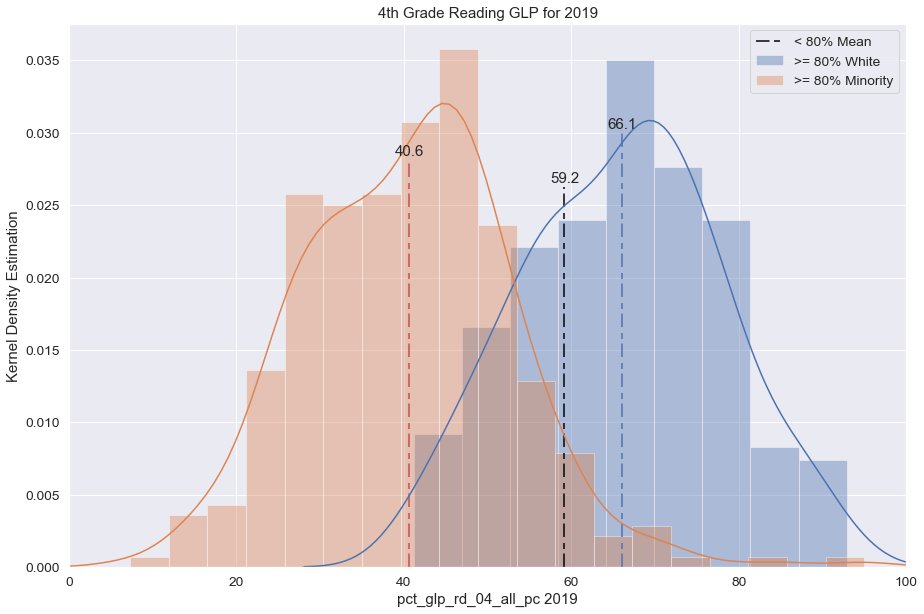

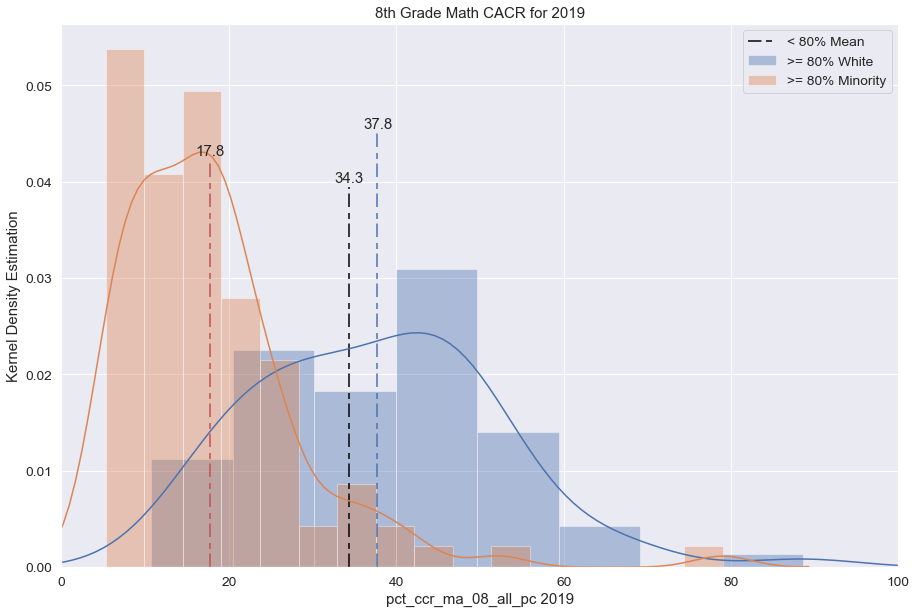

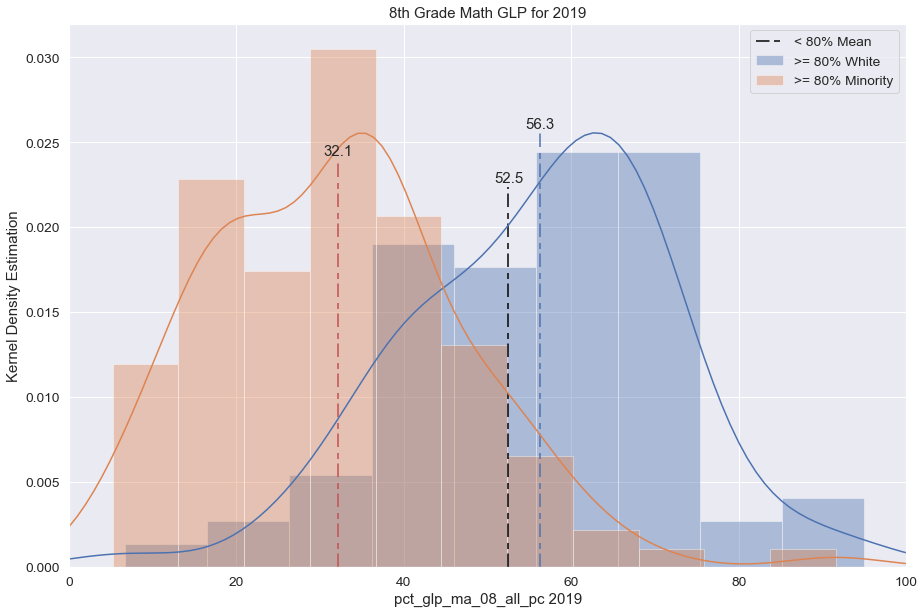

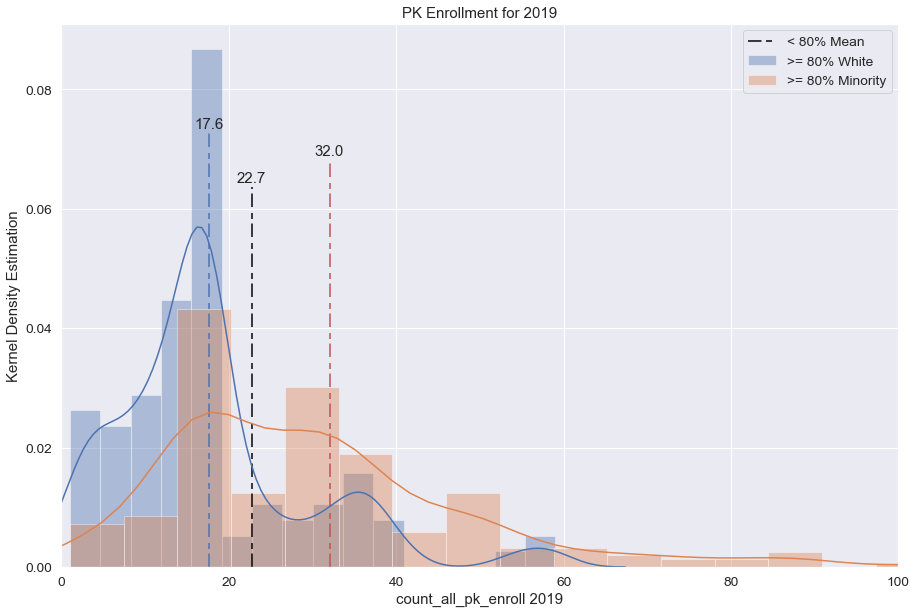

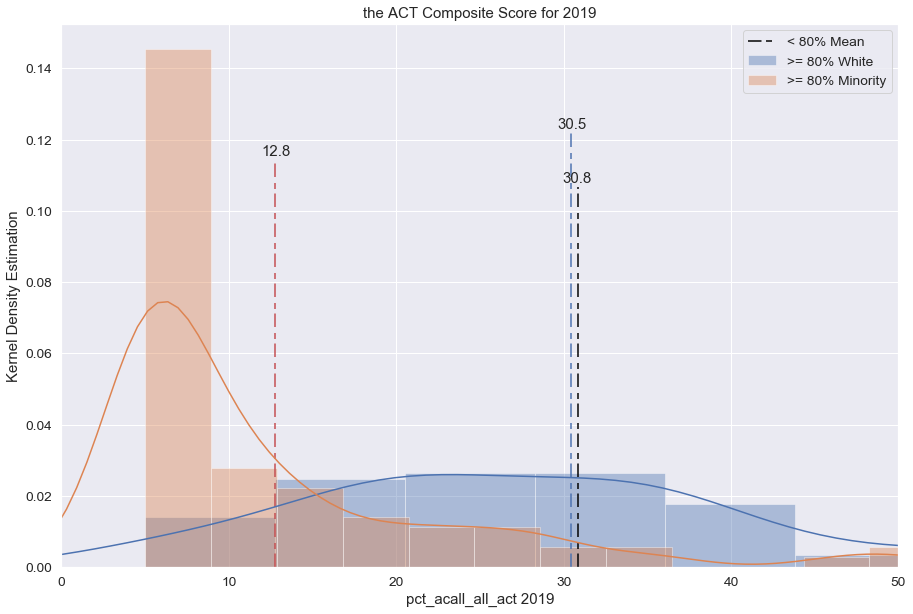

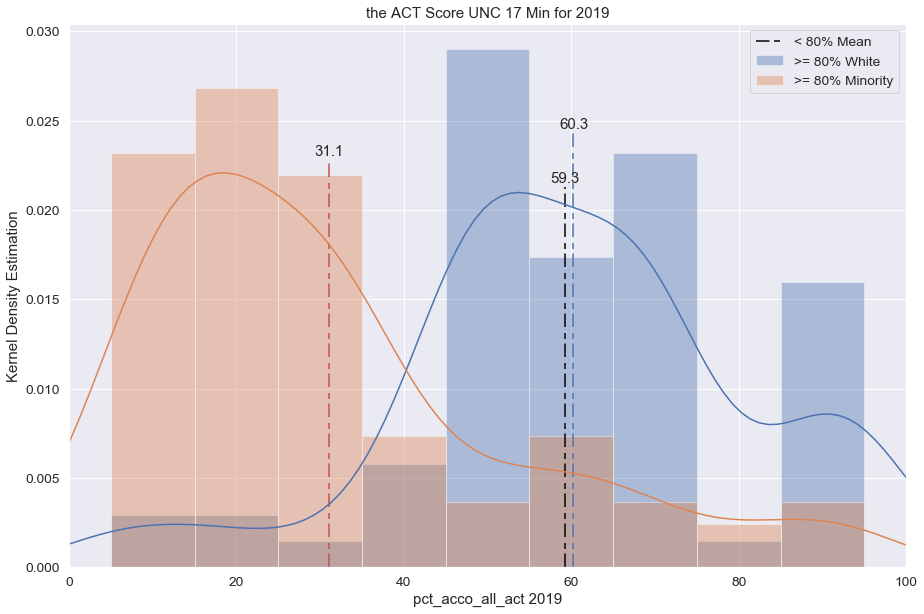

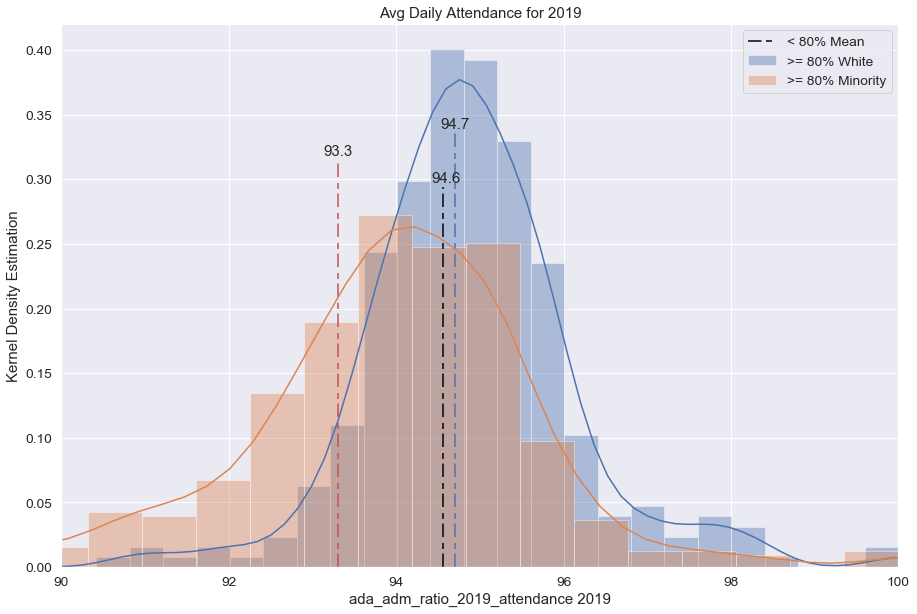

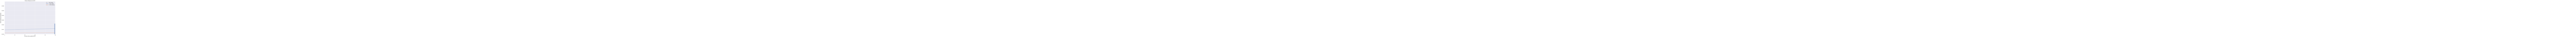

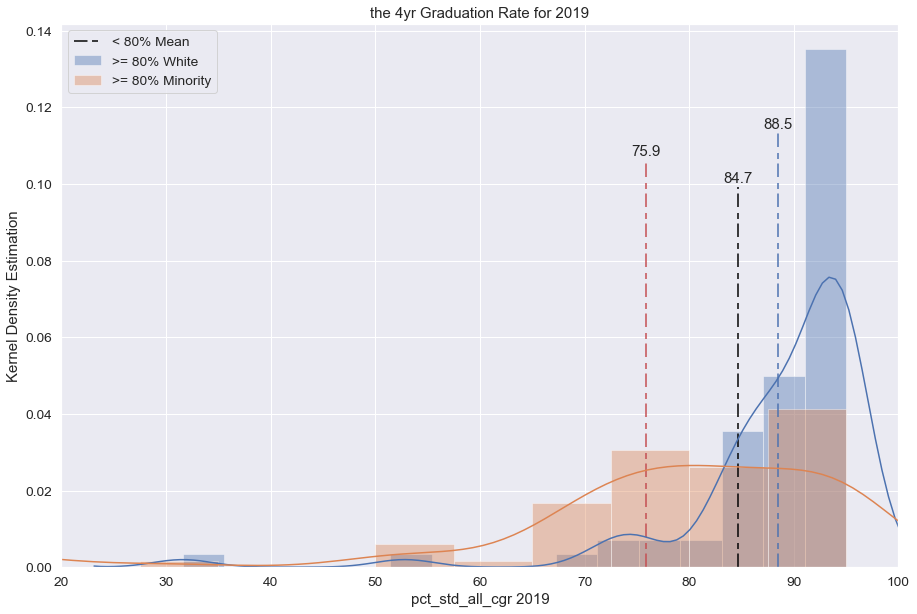

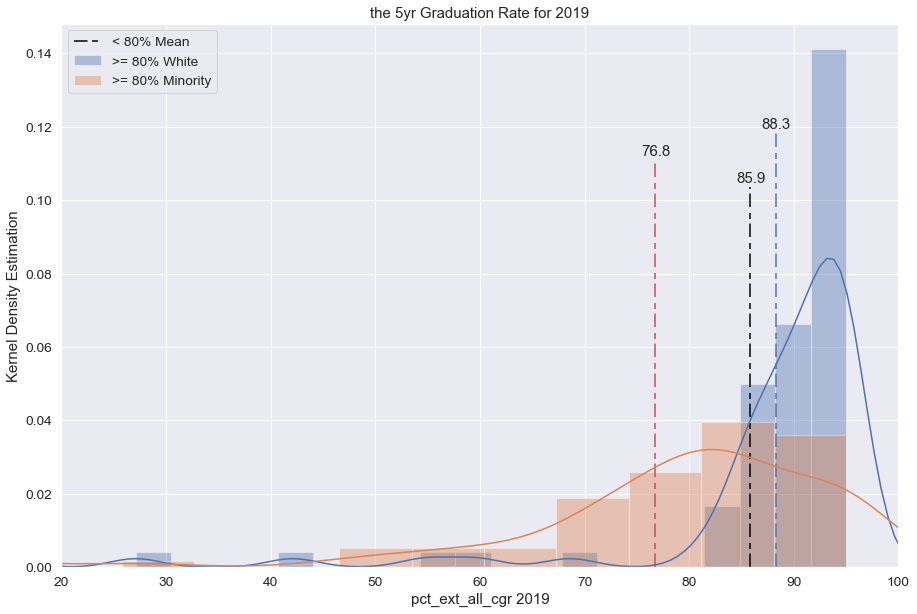

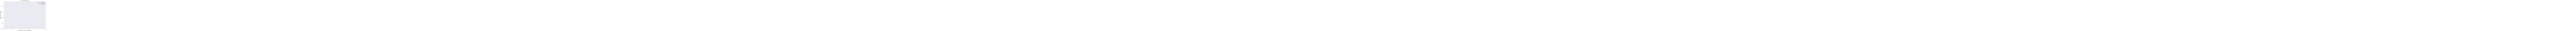

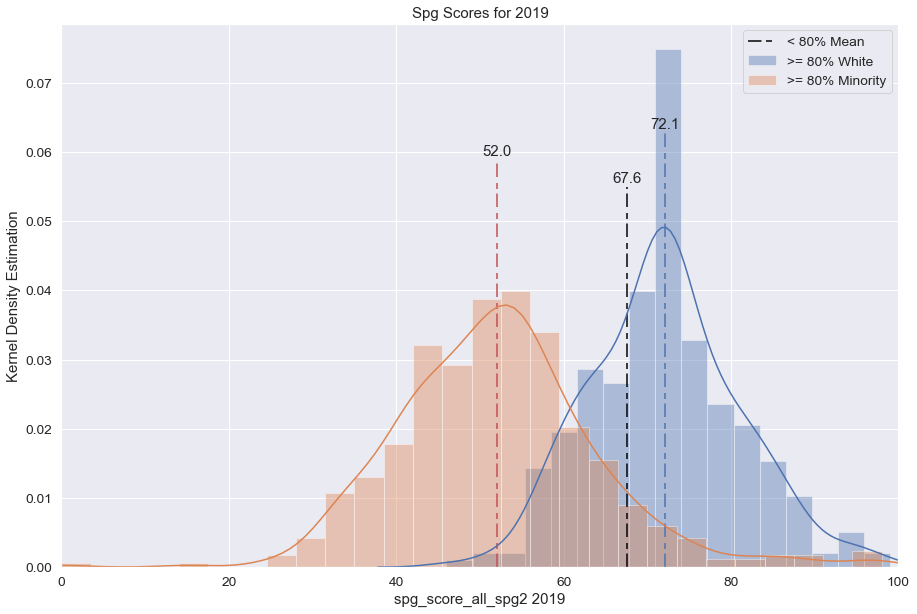

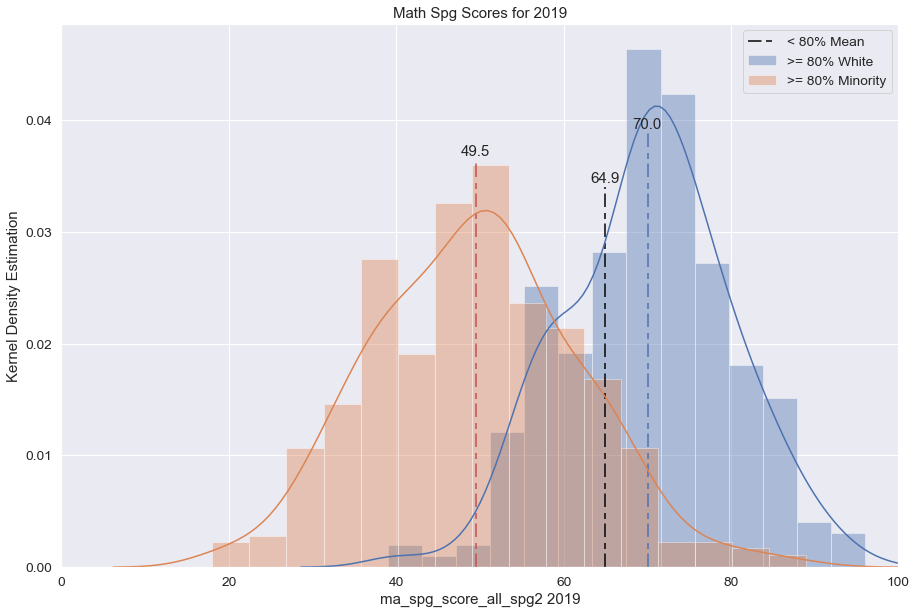

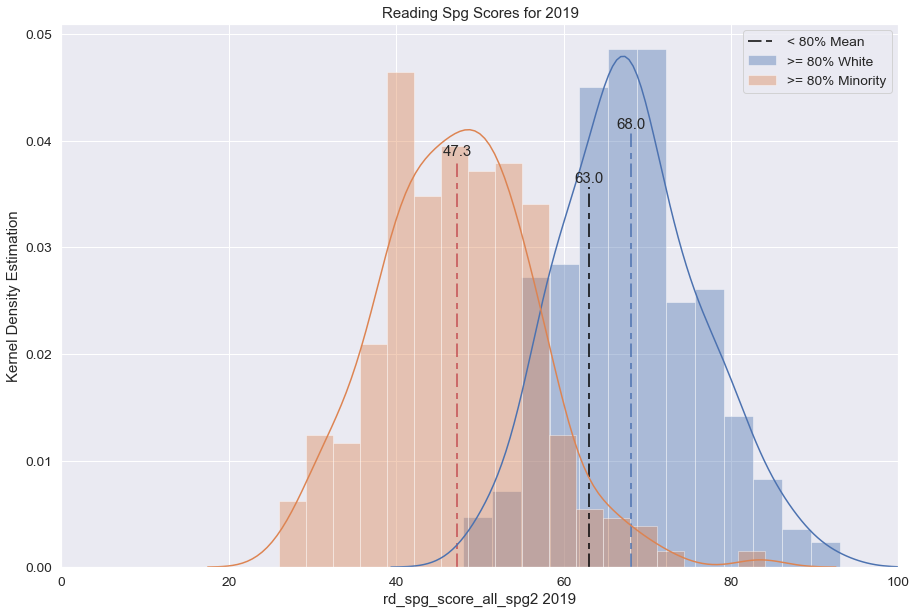

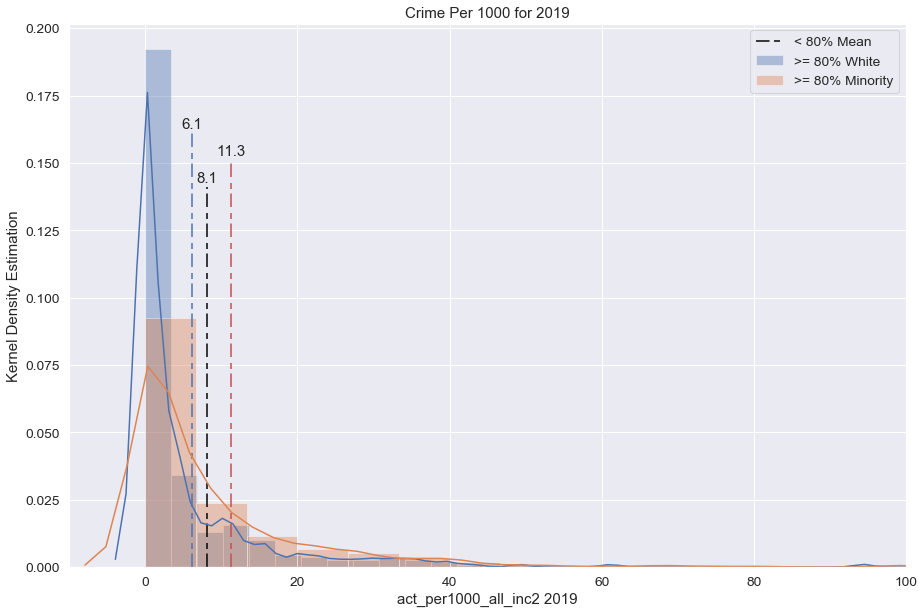

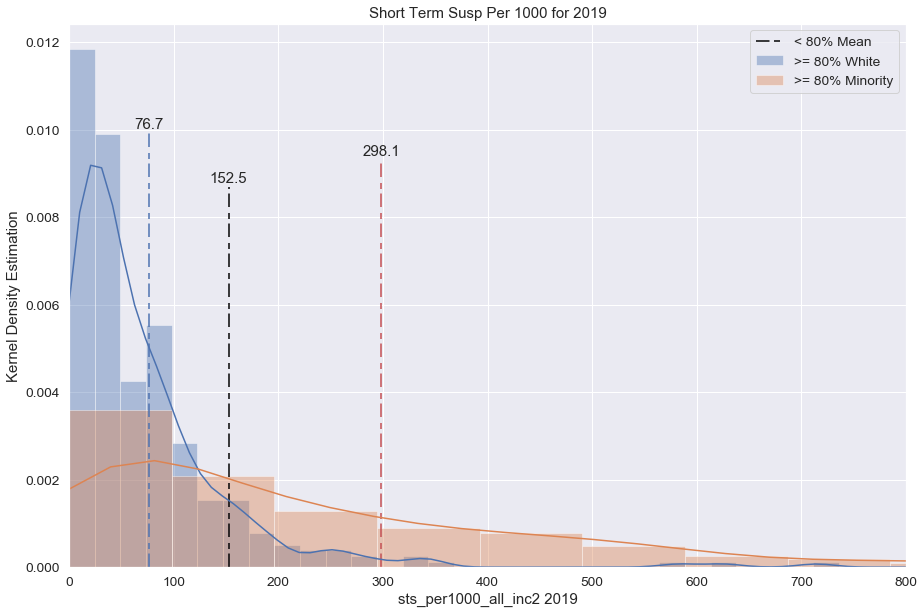

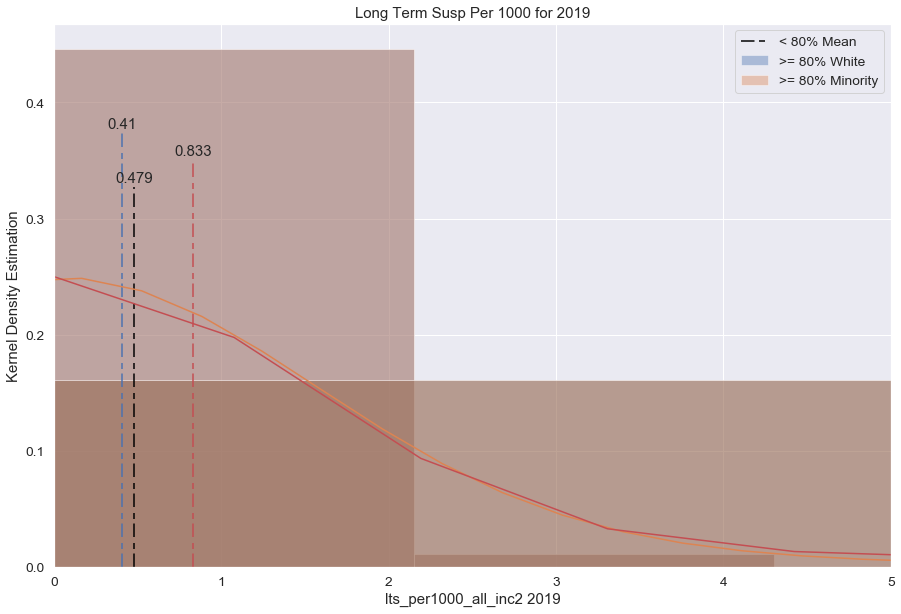

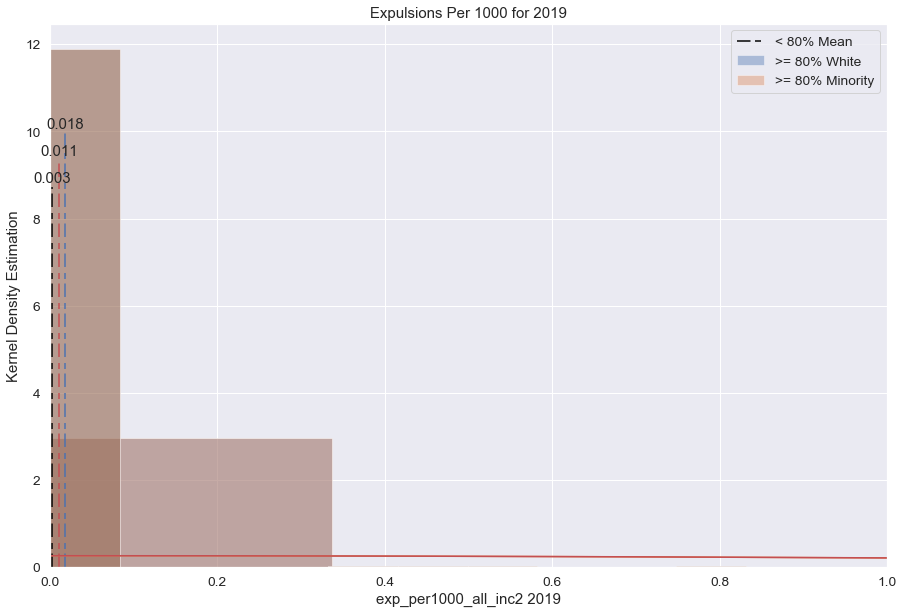

In [751]:
#Let's plot all of the important features over the past 6 years. 
datasets = [schData2019] #schData2014,schData2015,schData2016,schData2017,schData2018,

#Plot Key Performance Indicators for 2019
for col,colName, kipXlim in zip(topLineKips, kipNames, kipXlims):
    PlotColumnKdeByYears(datasets, col, colName, kipXlim)
    

In [752]:
kipCols = ['HighlySegregatedType'] + topLineKips

kipsByCampus = schData2019[kipCols]
kipsByCampus = kipsByCampus.groupby(['HighlySegregatedType'], as_index=False).mean().set_index('HighlySegregatedType').T.reset_index()
kipsByCampus.rename({'index': 'Key Performance Indicator', 'None': 'Low Segregated'}, axis=1, inplace=True)
kipsByCampus.columns.name = None

kipsByCampus['White'] = np.round(kipsByCampus['White'], 2)
kipsByCampus['Minority'] = np.round(kipsByCampus['Minority'], 2)
kipsByCampus['Low Segregated'] = np.round(kipsByCampus['Low Segregated'], 2)

kipsByCampus['Performance Indicator Name'] = kipNames

kipsByCampus.set_index('Performance Indicator Name', inplace=True)
kipsByCampus.reset_index(inplace=True)
kipsByCampus.drop('Key Performance Indicator', axis=1)

decreasingKips= ['count_all_pk_enroll',
                 'pct_all_chron_absent',
                 'act_per1000_all_inc2',
                 'sts_per1000_all_inc2',
                 'lts_per1000_all_inc2',
                 'exp_per1000_all_inc2']

In [755]:
kipsByCampus_incr = kipsByCampus[~kipsByCampus['Key Performance Indicator'].isin(decreasingKips)].copy()

kipsByCampus_incr['Priviledge Difference'] = np.round(kipsByCampus_incr['White'] - kipsByCampus_incr['Minority'],2) 
kipsByCampus_incr['Priviledge Factor'] = np.round((kipsByCampus_incr['White'] / kipsByCampus_incr['Minority']),2) 

print('\r')
print('                          Key Performance Indicators That Increase')
print('-------------------------------------------------------------------------------------')
kipsByCampus_incr.drop('Key Performance Indicator', axis=1)


                          Key Performance Indicators That Increase
-------------------------------------------------------------------------------------


,Performance Indicator Name,Minority,Low Segregated,White,Priviledge Difference,Priviledge Factor
0,4th Grade Reading CACR,27.11,45.64,52.08,24.97,1.92
1,4th Grade Reading GLP,40.59,59.16,66.06,25.47,1.63
2,8th Grade Math CACR,17.80,34.32,37.75,19.95,2.12
3,8th Grade Math GLP,32.14,52.46,56.27,24.13,1.75
5,the ACT Composite Score,12.77,30.84,30.46,17.69,2.39
6,the ACT Score UNC 17 Min,31.06,59.25,60.26,29.20,1.94
7,Avg Daily Attendance,93.30,94.56,94.71,1.41,1.02
9,the 4yr Graduation Rate,75.85,84.67,88.48,12.63,1.17
10,the 5yr Graduation Rate,76.76,85.86,88.25,11.49,1.15
11,Pct Enrl College,49.33,61.23,60.01,10.68,1.22


In [756]:
print('Average Priviledge Difference for Highly White Segregated Schools:')
print(np.round(kipsByCampus_incr['Priviledge Difference'].mean(),2))
print('Average Priviledge Factor for Highly White Segregated Schools:')
print(np.round(kipsByCampus_incr['Priviledge Factor'].mean(),2))

Average Priviledge Difference for Highly White Segregated Schools:
18.38
Average Priviledge Factor for Highly White Segregated Schools:
1.58


### Comparing Key Performance Indicators That Increase
* The table above shows 14 Key Performance indicators that should each increase in order for North Carolina to hit the 2030 goals set by the experts at [MyFutureNC](https://www.myfuturenc.org/).
* On average, highly White segregated campuses show an 18.38 point increase across all 14 indicators when compared to highly minority segregated campuses. 
* Likewise, key performance indicators for highly White segregated campuses are 1.58 times greater than at highly minority segregated campuses.
* Most concerning are ACT composite scores, which are 2.39 times lower for highly minority segregated campuses on average.
* Almost twice as many highly White segregated students (1.94 times) achieve at or above the minimum ACT score required to gain acceptance at UNC. 
* As a result, only 49.33% of highly Minority segregated campus students are enrolled in college one year after graduation as compared to 60% of highly White segregated students.    

In [757]:
kipsByCampus_decr = kipsByCampus[kipsByCampus['Key Performance Indicator'].isin(decreasingKips)].copy()

kipsByCampus_decr['Priviledge Difference'] = np.round(kipsByCampus_decr['Minority'] - kipsByCampus_decr['White'],2) 
kipsByCampus_decr['Priviledge Factor'] = np.round((kipsByCampus_decr['Minority'] / kipsByCampus_decr['White']),2) 

print('\r')
print('                          Key Performance Indicators That Decrease')
print('------------------------------------------------------------------------------------')
kipsByCampus_decr.drop('Key Performance Indicator', axis=1)


                          Key Performance Indicators That Decrease
------------------------------------------------------------------------------------


,Performance Indicator Name,Minority,Low Segregated,White,Priviledge Difference,Priviledge Factor
4,PK Enrollment,32.04,22.71,17.65,14.39,1.82
8,Chronic Absence,25.39,16.58,14.28,11.11,1.78
15,Crime Per 1000,11.26,8.10,6.09,5.17,1.85
16,Short Term Susp Per 1000,298.10,152.48,76.72,221.38,3.89
17,Long Term Susp Per 1000,0.83,0.48,0.41,0.42,2.02
18,Expulsions Per 1000,0.01,0.00,0.02,-0.01,0.50


In [758]:
print('Average Priviledge Difference (decreasing goals):')
print(np.round(kipsByCampus_decr['Priviledge Difference'].mean(),2))
print('Average Priviledge Factor  (decreasing goals):')
print(np.round(kipsByCampus_decr['Priviledge Factor'].mean(),2))

Average Priviledge Difference (decreasing goals):
42.08
Average Priviledge Factor  (decreasing goals):
1.98


## Comparing Key Performance Indicators That Decrease
* The table above shows 6 Key Performance indicators that should each decrease in order for North Carolina to hit the 2030 goals set by the experts at [MyFutureNC](https://www.myfuturenc.org/).
* PK Enrollment is a highly interesting indicator here, since the MyFutureNC goal is to increase PK Enrollment by 27% between now and 2030 in North Carolina.  
* The current statewide average for PK Enrollment is 24.61 students per class.  By 2030, a 27% increase would result in 31.25 students per PK class.  Increasing this goal by 27% will require careful planning and additional resources to support such a large increase in class size.  
* Highly minority segregated campuses exceed statewide 2030 goals averaging 32.04 students per class at their current 2020 resource levels, while highly segregated White campuses average only 17.65 students per class.  This is certainly a privilege. 

### Comparing Crime and Punishment
Most startling are the differences in how highly segregated Minority students are punished when compared to other public education campuses in North Carolina.
* Highly segregated minority students experience crime rates that are 1.85 times higher than highly segregated White students. 
* Highly segregated minority students are also punished much more frequently with 3.89 times more short term suspensions and 2.02 times more long term suspensions.  
* Expulsions per 1000 students are very similar across each population reviewed.  

In [759]:
print('Campus Counts by Campus Segregation and Poverty Types')
seg_by_pov_cts = pd.crosstab(schData2019.HighlySegregatedType, schData2019.poverty_eq)
seg_by_pov_cts

Campus Counts by Campus Segregation and Poverty Types


poverty_eq,HIGH,LOW,NEITHER
HighlySegregatedType,,,
Minority,278,37,193
None,260,446,920
White,21,90,208


In [760]:
print('Campus Totals by Poverty Category') 
seg_by_pov_cts.sum()

Campus Totals by Poverty Category


poverty_eq
HIGH        559
LOW         573
NEITHER    1321
dtype: int64

In [761]:
print('Campus Percentages by Poverty Category') 
np.round((seg_by_pov_cts.sum() / seg_by_pov_cts.sum().sum()) * 100,2)

Campus Percentages by Poverty Category


poverty_eq
HIGH       22.79
LOW        23.36
NEITHER    53.85
dtype: float64

In [762]:
print('Total Schools Accounted For:',seg_by_pov_cts.sum().sum())

Total Schools Accounted For: 2453


### Considering State Assigned Campus Poverty Levels 
**NCDPI States** - "A “high-poverty school” is defined as a school in the top quartile of poverty in the State, and a “low-poverty school” is defined as a school in the bottom quartile of poverty in the State.  This information will be a key indicator of equitable access to non-novice, qualified teachers and school leaders in schools across the State. Because not all schools are included in the high-poverty and low-poverty designations, the sum of teachers or principals reported on these measures will not equal the total number of teachers or principals in the district in most cases."

* North Carolina assigns each public school campus with a poverty level of High, Low, or Neither.
* The tables above illustrate that out of 2,453 schools reporting race memberships during 2019-20, 46.15% were given a poverty level rating of either High (22.79%) or Low (22.36%)
* 53.85% of schools are neither High or Low poverty.

In [625]:
print('Campus Pecentage of Total by Campus Segregation and Poverty Types')
seg_by_pov = pd.crosstab(schData2019.HighlySegregatedType, schData2019.poverty_eq,normalize=True)
seg_by_pov = np.round(seg_by_pov * 100,2)
seg_by_pov

Campus Pecentage of Total by Campus Segregation and Poverty Types


poverty_eq,HIGH,LOW,NEITHER
HighlySegregatedType,,,
Minority,11.33,1.51,7.87
None,10.60,18.18,37.51
White,0.86,3.67,8.48


In [628]:
print('Campus Pecentage by Poverty Level')
seg_by_pov = pd.crosstab(schData2019.HighlySegregatedType, schData2019.poverty_eq,normalize='index')
np.round(seg_by_pov * 100,2)

Campus Pecentage by Poverty Level


poverty_eq,HIGH,LOW,NEITHER
HighlySegregatedType,,,
Minority,54.72,7.28,37.99
None,15.99,27.43,56.58
White,6.58,28.21,65.20


In [629]:
print('Campus Pecentage by Segregation Types')
seg_by_pov = pd.crosstab(schData2019.HighlySegregatedType, schData2019.poverty_eq,normalize='columns')
np.round(seg_by_pov * 100,2)

Campus Pecentage by Segregation Types


poverty_eq,HIGH,LOW,NEITHER
HighlySegregatedType,,,
Minority,49.73,6.46,14.61
None,46.51,77.84,69.64
White,3.76,15.71,15.75


### Minorities Dominate High Poverty North Carolina Schools  
* As previously shown, High poverty schools make up for 22.79% of all North Carolina schools reporting race memberships. 
 * Highly segregated Minority schools account for 54.72% of all High poverty schools.
 * Highly segregated White schools account for only 6.58% of all High poverty schools.
* On the contrary, Low poverty schools account for 23.36% of all North Carolina schools reporting race memberships. 
 * Highly segregated Minority schools account for 7.28% of all Low poverty schools.
 * Highly segregated White schools account for 28.21% of all Low poverty schools.
* 49.73% of all High poverty schools in North Carolina are also Highly Minority segregated, while only 6.58% of Highly segregated White schools are considered High poverty.    
* 93.41% of all highly White segregated schools are NOT considered High poverty schools. 

In [763]:
schData2019['students_per_teacher'] =  schData2019['avg_student_num_adm'] / schData2019['number_of_teachers_eq']

In [764]:
teacherCols = ['HighlySegregatedType','students_per_teacher','number_of_teachers_eq',
               'beg_teacher_eq','pct_beg_teachers_eq','prov_teachers_eq','pct_prov_teachers_eq']

teacherByCampus = schData2019[teacherCols]
teacherByCampus = teacherByCampus.groupby(['HighlySegregatedType'], as_index=False).mean()\
                                          .set_index('HighlySegregatedType').T.reset_index()
teacherByCampus.rename({'index': 'Key Performance Indicator', 'None': 'Low Segregated'}, axis=1, inplace=True) 
teacherByCampus.columns.name = None

teacherByCampus['White'] = np.round(teacherByCampus['White'], 2)
teacherByCampus['Minority'] = np.round(teacherByCampus['Minority'], 2)
teacherByCampus['Low Segregated'] = np.round(teacherByCampus['Low Segregated'], 2)
teacherByCampus


,Key Performance Indicator,Minority,Low Segregated,White
0,students_per_teacher,11.99,13.85,13.15
1,number_of_teachers_eq,42.61,44.33,33.17
2,beg_teacher_eq,8.91,5.80,3.17
3,pct_beg_teachers_eq,0.21,0.13,0.10
4,prov_teachers_eq,0.34,0.12,0.03
5,pct_prov_teachers_eq,0.01,0.00,0.00


### Educator and Classroom Experiences 
* Both the number of educators and average students per teacher remain consistent across each school type reviewed.  
* The min and max average students per teacher varies by only 1.86 students with low segregated schools having the highest average students per teacher.
* The State of North Carolina has a very low overall percentage of provisionally licensed teachers with all campus categories reviewed having less than 1%.

### What is a Beginning Teacher?
**NCDPI States** - "Beginning teachers are defined as teachers who are in their first three years of teaching (either in NC or other state).  NCDPI tracks the number of beginning teachers in a school because these teachers require more support during these critical years in order to develop into highly effective teachers.  On average, beginning teachers are less effective than more experienced teachers, so it is critical that schools have a balance between beginning teachers and highly effective, experienced teachers who can mentor them."

### North Carolina Provides Less Experienced Teachers to Highly Segregated Minorities
* Highly Minority segregated schools at 21% have over twice the amount of inexperienced teachers as highly segregated White schools (10%) and 8% more than those with < 80% segregation levels. 
* While schools with < 80% segregation levels average around 12% inexperienced teachers, highly White segregated schools have the lowest average percentage only 10%.    